In [1]:
import pandas as pd
import csv

import pickle

import pandas as pd
import numpy as np
import datetime
import math


from sklearn.model_selection import train_test_split
from keras.layers.wrappers import Bidirectional
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM,GRU
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from keras.layers.core import Dropout
from keras.layers.normalization import BatchNormalization

from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [2]:
#http://timeseriesclassification.com/description.php?Dataset=CBF
#上記のデータからダウンロード

df_main=pd.read_csv("/dockervolume/ono/test_data/CBF/CBF_df.csv",header=None)

In [3]:
df_main_target=df_main[128]
del df_main[128]

In [4]:
"""
正規化しなかった場合
df_main_T_std=df_main.as_matrix().transpose()

"""

# 標準化
sc = StandardScaler()
df_main_T_std = sc.fit_transform(df_main.T)



In [5]:

X = np.array(df_main_T_std.T).reshape(len(df_main_T_std.T), 1, len(df_main_T_std))

n_labels = 3               # 分類クラスの数
target_vector = list(df_main_target-1)
Y=np.eye(n_labels)[target_vector]

X_train, X_validation, Y_train, Y_validation = \
    train_test_split(X, Y, test_size=0.4)

In [6]:
n_hidden = 100
maxlen=len(X_train[0])
n_in = len(X[0][0])  

n_out = len(Y[0])  


def weight_variable(shape, name=None):
    return np.random.normal(scale=.01, size=shape)


early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

model = Sequential()

model.add(Bidirectional(LSTM(n_hidden),input_shape=(maxlen, n_in)))

model.add(Dense(n_out, kernel_initializer=weight_variable))
#model.add(Activation('linear'))
model.add(Activation('softmax'))


optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
             metrics=['accuracy'])

In [7]:

'''
モデル学習
'''
epochs = 30
batch_size = 32

hist=model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_validation, Y_validation))
          #callbacks=[early_stopping])


Train on 558 samples, validate on 372 samples
Epoch 1/30
558/558 [==============================] - 0s - loss: 0.9713 - acc: 0.6953 - val_loss: 0.7646 - val_acc: 0.7742
Epoch 2/30
558/558 [==============================] - 0s - loss: 0.5619 - acc: 0.8262 - val_loss: 0.4079 - val_acc: 0.8575
Epoch 3/30
558/558 [==============================] - 0s - loss: 0.2677 - acc: 0.9229 - val_loss: 0.2387 - val_acc: 0.9059
Epoch 4/30
558/558 [==============================] - 0s - loss: 0.1456 - acc: 0.9534 - val_loss: 0.1554 - val_acc: 0.9435
Epoch 5/30
558/558 [==============================] - 0s - loss: 0.1004 - acc: 0.9713 - val_loss: 0.1007 - val_acc: 0.9758
Epoch 6/30
558/558 [==============================] - 0s - loss: 0.0606 - acc: 0.9839 - val_loss: 0.0811 - val_acc: 0.9812
Epoch 7/30
558/558 [==============================] - 0s - loss: 0.0422 - acc: 0.9928 - val_loss: 0.0600 - val_acc: 0.9839
Epoch 8/30
558/558 [==============================] - 0s - loss: 0.0303 - acc: 1.0000 - val_l

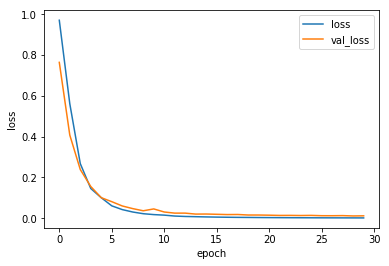

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(hist.history["loss"],label="loss")
plt.plot(hist.history["val_loss"],label="val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

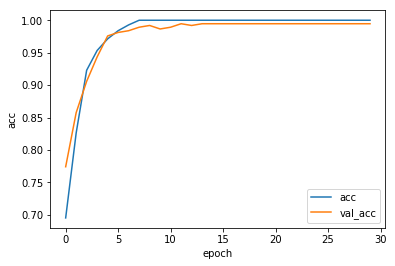

In [9]:
plt.plot(hist.history["acc"],label="acc")
plt.plot(hist.history["val_acc"],label="val_acc")
plt.xlabel("epoch")
plt.ylabel("acc")
plt.legend()

Best Algorithm:	BOSS　

Best Accuracy:	99.81%